In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import and split data
dx, dy = load_breast_cancer(return_X_y=True)
dx_std = StandardScaler().fit_transform(dx)
dx_train, dx_test, dy_train, dy_test = train_test_split(dx_std, dy, test_size=0.2, random_state=100)

#Check the data
print([[x,y] for x, y in zip(dx_train[0:5], dy_train[0:5])])

[[array([-0.30596615,  0.00473593, -0.38550046, -0.36316091, -1.12158738,
       -1.25934446, -1.1061848 , -1.15433606,  0.02694897, -1.10397473,
       -0.0042302 , -0.0051771 , -0.13418261, -0.16230835,  0.15001311,
       -0.94370263, -1.03455602, -1.23751977,  0.16438843, -0.30445597,
       -0.42228058, -0.55810202, -0.50699109, -0.45087495, -1.3268508 ,
       -1.22364683, -1.29697922, -1.57589532, -0.74701944, -1.16682532]), 1], [array([-0.35424856,  2.24104744, -0.39003138, -0.39984984, -1.07675315,
       -0.87368185, -0.33709238, -0.65746658, -0.89673971, -0.81053069,
       -0.6986422 ,  0.25971711, -0.67525107, -0.51719593,  0.45702556,
       -0.22065966,  0.23496007, -0.6774098 , -0.43495016, -0.37594547,
       -0.49268864,  1.63866073, -0.54869126, -0.50079967, -0.42383144,
       -0.58693459, -0.13571466, -0.75639985, -0.85541074, -0.63871258]), 1], [array([ 0.46087218, -0.01620767,  0.62324754,  0.29496443,  1.98834244,
        2.50271372,  2.54364574,  1.94179302,  2

In [3]:
#Decision Tree Modeling
tree_param_grid = {'max_depth': np.arange(10) + 1}
tree_model = GridSearchCV(DecisionTreeClassifier(), tree_param_grid)
tree_model.fit(dx_train, dy_train)

print('Best params:', tree_model.best_params_)
print('CV score:  ', tree_model.best_score_.round(3))
print('Test score:', tree_model.score(dx_test, dy_test).round(3))

Best params: {'max_depth': 4}
CV score:   0.932
Test score: 0.956


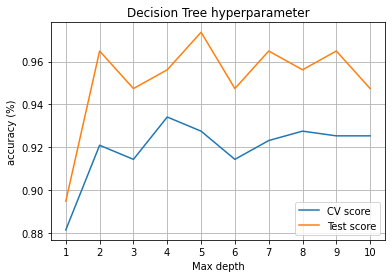

In [4]:
#Decision Tree modeling (test max_depth from 1 to 10)
tree_cv_scores = []
tree_test_scores =[]
depth_range = np.arange(10) + 1
depth_str = [str(n) for n in depth_range]

for d in depth_range:
    tree = DecisionTreeClassifier(max_depth=d).fit(dx_train, dy_train)
    tree_cv_scores.append(cross_val_score(tree, dx_train, dy_train, cv=5).mean())
    tree_test_scores.append(tree.score(dx_test, dy_test))
    
plt.title('Decision Tree hyperparameter')
plt.plot(depth_str, tree_cv_scores, label='CV score')
plt.plot(depth_str, tree_test_scores, label='Test score')
plt.xlabel('Max depth')
plt.ylabel('accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
#Export the Tree
feature_names = list(load_breast_cancer().feature_names)
best_tree_model = DecisionTreeClassifier(max_depth=4).fit(dx_train, dy_train)
print(export_text(best_tree_model, feature_names=feature_names))

|--- worst concave points <= 0.49
|   |--- worst area <= 0.14
|   |   |--- worst concave points <= 0.26
|   |   |   |--- area error <= -0.09
|   |   |   |   |--- class: 1
|   |   |   |--- area error >  -0.09
|   |   |   |   |--- class: 1
|   |   |--- worst concave points >  0.26
|   |   |   |--- mean texture <= 0.38
|   |   |   |   |--- class: 1
|   |   |   |--- mean texture >  0.38
|   |   |   |   |--- class: 0
|   |--- worst area >  0.14
|   |   |--- mean texture <= -0.18
|   |   |   |--- symmetry error <= -0.33
|   |   |   |   |--- class: 1
|   |   |   |--- symmetry error >  -0.33
|   |   |   |   |--- class: 0
|   |   |--- mean texture >  -0.18
|   |   |   |--- class: 0
|--- worst concave points >  0.49
|   |--- mean concave points <= 0.03
|   |   |--- class: 1
|   |--- mean concave points >  0.03
|   |   |--- mean smoothness <= -1.10
|   |   |   |--- class: 1
|   |   |--- mean smoothness >  -1.10
|   |   |   |--- area error <= -0.59
|   |   |   |   |--- class: 1
|   |   |   |--- ar

In [6]:
#Testing of Decision Tree Model
tree_predictions = best_tree_model.predict(dx_test[:10])
print('Dataset:    ', dy_test[:10])
print('Predictions:', tree_predictions)

Dataset:     [0 1 0 1 1 1 0 0 0 1]
Predictions: [0 1 0 1 1 1 0 0 1 1]
